# Clustering jerarquico
Presenta: Juliho Castillo Colmenares

**¡Bienvenidos a la actividad práctica del módulo!**

*Antes de empezar*

En este ejercicio usaremos Clustering jerárquico para hacer recomendaciones de compras a los clientes. La idea consiste en recomendar a un cliente los productos que ha comprado otra persona que pertenece al mismo clúster o segmento.

El objetivo de esta actividad es que realices un análisis de agrupación por “Clustering Jerárquico” a una base de datos de manera que  puedas generar conclusiones de acuerdo a diversas categorías.

*Paso a paso:*

- Extrae de internet la base de datos “Amazon.xlsx” de la siguiente liga y agregala a un DataFrame en Python.
https://github.com/JoseRaulCastro/EBAC/blob/main/Amazon.xlsx
- El archivo “Amazon.xlsx” contiene los promedios de evaluación de 100 personas que adquirieron los mismos productos o muy similares en la tienda AMAZON.
- Con base en los resultados de su análisis, ¿qué productos recomendaría a Salomé? ¿Qué productos recomendaría a Stephanía? ¿Qué productos recomendaría a Lydia? La respuesta debe estar reflejada en función de otros clientes. Por ejemplo, “Recomendaría a Salomé los mismos productos que compró XXXXX”. Dé nombres de clientes en cada caso. Expliqué claramente sus conclusiones.

In [65]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
dataframe = pd.read_excel('Amazon.xlsx')

# Rename the 'Unnamed: 0' column to 'Consumidor'
dataframe.rename(columns={'Unnamed: 0': 'Consumidor'}, inplace=True)

# Display the first few rows to verify the change
dataframe.head()

,Consumidor,Velocidad Entrega,Precio,Durabilidad,Imagen Producto,Valor Educativo,Servicio Retorno,Tamano Paquete,Calidad Producto,Numero Estrellas
0,Adam,205,3,345,235,24,23,26,21,17
1,Anna,9,15,315,33,25,4,42,215,28
2,Bernard,17,26,285,3,43,27,41,26,33
3,Edward,135,5,355,295,18,23,39,195,17
4,Emilia,3,45,48,39,34,46,225,34,43


In [66]:

# Select relevant features for clustering
features = dataframe[['Velocidad Entrega', 'Precio', 'Durabilidad', 'Imagen Producto', 
                      'Valor Educativo', 'Servicio Retorno', 'Tamano Paquete', 
                      'Calidad Producto', 'Numero Estrellas']]

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

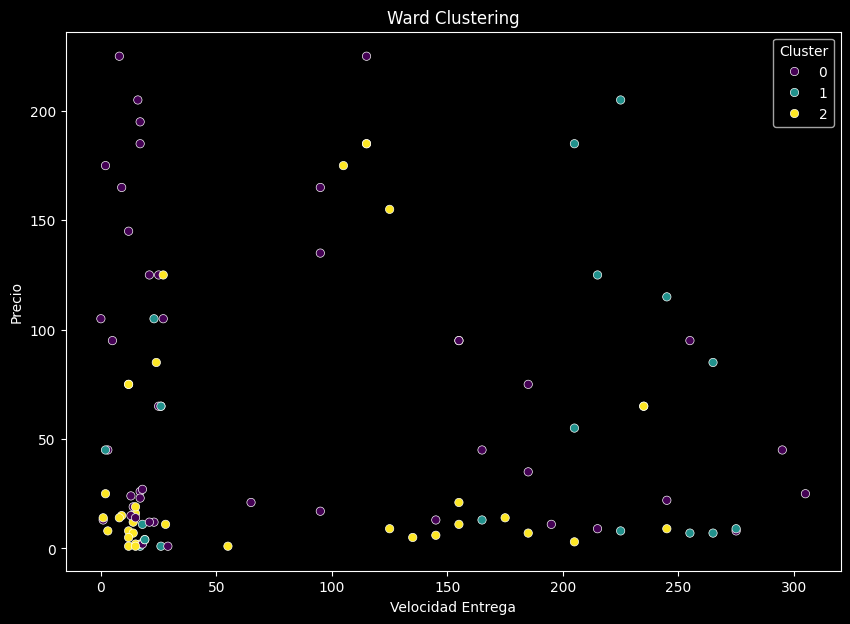

In [67]:

# Perform Ward clustering
ward = AgglomerativeClustering(n_clusters=3, linkage='ward')
clusters = ward.fit_predict(scaled_features)

# Add the cluster labels to the dataframe
dataframe['Cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(data=dataframe, x='Velocidad Entrega', y='Precio', hue='Cluster', palette='viridis')
plt.title('Ward Clustering')
plt.show()

In [68]:
salome = dataframe[dataframe['Consumidor'] == 'Salome']
salome 

,Consumidor,Velocidad Entrega,Precio,Durabilidad,Imagen Producto,Valor Educativo,Servicio Retorno,Tamano Paquete,Calidad Producto,Numero Estrellas,Cluster
81,Salome,17,23,275,41,4,44,315,28,32,0


In [69]:
salome_cluster = salome['Cluster'].values[0]
salome_cluster

np.int64(0)

In [70]:
similiar_to_salome = dataframe[dataframe['Cluster'] == salome_cluster]
similiar_to_salome.to_csv('similiar_to_salome.csv', index=False)

In [71]:
# Create a function with the code to find similar consumers
def get_similar_consumers(dataframe, consumer):
  try:
    cluster = dataframe[dataframe['Consumidor'] == consumer]['Cluster'].values[0]
    similar_consumers = dataframe[dataframe['Cluster'] == cluster]
    return similar_consumers
  except IndexError:
    return 'Consumer not found in the dataframe'

salome = get_similar_consumers(dataframe, 'Salome')
salome.equals(similiar_to_salome)

True

In [72]:
salome['Cluster'].unique()

array([0])

In [73]:
stephania = get_similar_consumers(dataframe, 'Stephania')
stephania['Cluster'].unique()

array([1])

In [74]:
lydia = get_similar_consumers(dataframe, 'Lydia')
lydia['Cluster'].unique()

array([2])

### Conclusiones

A partir de nuestro analisis de clustering jerarquico, determinamos que ninguna de las clientas recibiría las mismas recomendaciones de productos, ya que cada una de ellas pertenece a un cluster diferente. Los productos recomendados para Salomé se encuentran en el archivo `similar_to_salome.csv`. 